In [2]:
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_cross_validation_metric

# Основен пример од документацијата на FB Prophet

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
df.head()

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572


In [7]:
model = Prophet()
model.fit(df)

15:04:33 - cmdstanpy - INFO - Chain [1] start processing
15:04:34 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
3265,2017-01-15
3266,2017-01-16
3267,2017-01-17
3268,2017-01-18
3269,2017-01-19


In [11]:
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3265,2017-01-15,8.210097,7.484915,8.946512
3266,2017-01-16,8.535122,7.805312,9.217765
3267,2017-01-17,8.322549,7.640407,9.103594
3268,2017-01-18,8.155179,7.462251,8.851596
3269,2017-01-19,8.167136,7.467708,8.879819


/home/jovan/repos/magisterska/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(
/home/jovan/repos/magisterska/.venv/lib/python3.12/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/jovan/repos/magisterska/.venv/lib/python3.12/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'

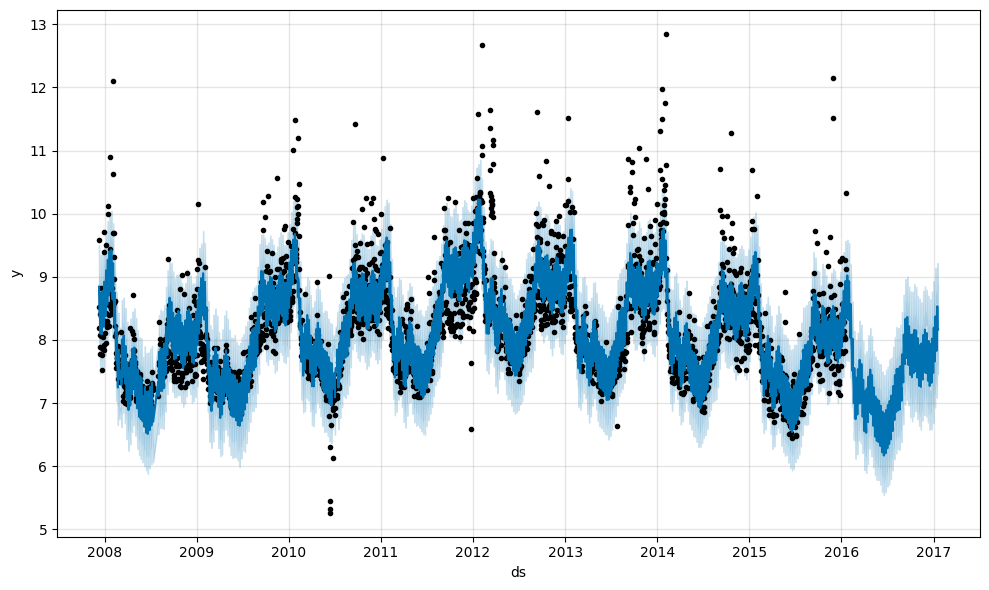

In [12]:
fig1 = model.plot(forecast)

# Cross validation на FB Prophet

In [14]:
df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

  0%|          | 0/11 [00:00<?, ?it/s]

15:09:20 - cmdstanpy - INFO - Chain [1] start processing
15:09:20 - cmdstanpy - INFO - Chain [1] done processing
15:09:20 - cmdstanpy - INFO - Chain [1] start processing
15:09:20 - cmdstanpy - INFO - Chain [1] done processing
15:09:20 - cmdstanpy - INFO - Chain [1] start processing
15:09:21 - cmdstanpy - INFO - Chain [1] done processing
15:09:21 - cmdstanpy - INFO - Chain [1] start processing
15:09:21 - cmdstanpy - INFO - Chain [1] done processing
15:09:21 - cmdstanpy - INFO - Chain [1] start processing
15:09:21 - cmdstanpy - INFO - Chain [1] done processing
15:09:21 - cmdstanpy - INFO - Chain [1] start processing
15:09:22 - cmdstanpy - INFO - Chain [1] done processing
15:09:22 - cmdstanpy - INFO - Chain [1] start processing
15:09:22 - cmdstanpy - INFO - Chain [1] done processing
15:09:22 - cmdstanpy - INFO - Chain [1] start processing
15:09:22 - cmdstanpy - INFO - Chain [1] done processing
15:09:22 - cmdstanpy - INFO - Chain [1] start processing
15:09:23 - cmdstanpy - INFO - Chain [1]

In [15]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2010-02-16,8.954582,8.451338,9.432319,8.242493,2010-02-15
1,2010-02-17,8.720932,8.235423,9.215662,8.008033,2010-02-15
2,2010-02-18,8.604608,8.079483,9.079374,8.045268,2010-02-15
3,2010-02-19,8.526379,8.049291,9.045716,7.928766,2010-02-15
4,2010-02-20,8.268247,7.761318,8.748701,7.745003,2010-02-15
...,...,...,...,...,...,...
3983,2016-01-16,8.578334,7.805385,9.280188,7.817223,2015-01-20
3984,2016-01-17,8.973000,8.191570,9.681601,9.273878,2015-01-20
3985,2016-01-18,9.279093,8.505355,9.999340,10.333775,2015-01-20
3986,2016-01-19,9.062197,8.268784,9.762439,9.125871,2015-01-20


In [17]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,37 days,0.493358,0.702395,0.503977,0.058376,0.049365,0.058677,0.681590
1,38 days,0.499112,0.706478,0.508946,0.058951,0.049135,0.059312,0.681590
2,39 days,0.521344,0.722042,0.515016,0.059547,0.049225,0.060034,0.680219
3,40 days,0.528651,0.727084,0.517873,0.059852,0.049072,0.060409,0.683874
4,41 days,0.536149,0.732222,0.518843,0.059927,0.049135,0.060548,0.688899
...,...,...,...,...,...,...,...,...
324,361 days,1.113987,1.055456,0.855985,0.102606,0.087221,0.101700,0.499543
325,362 days,1.129374,1.062720,0.862639,0.103210,0.088081,0.102257,0.500228
326,363 days,1.150602,1.072661,0.870124,0.103970,0.088473,0.102893,0.497031
327,364 days,1.167043,1.080297,0.877709,0.104895,0.089727,0.103634,0.491320


/home/jovan/repos/magisterska/.venv/lib/python3.12/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/home/jovan/repos/magisterska/.venv/lib/python3.12/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


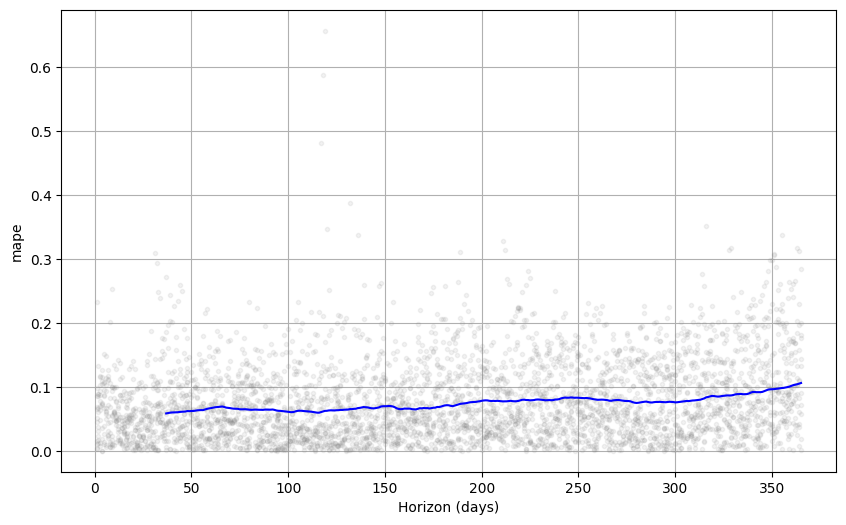

In [20]:
fig = plot_cross_validation_metric(df_cv, metric='mape')